Looking for an EEG stream...


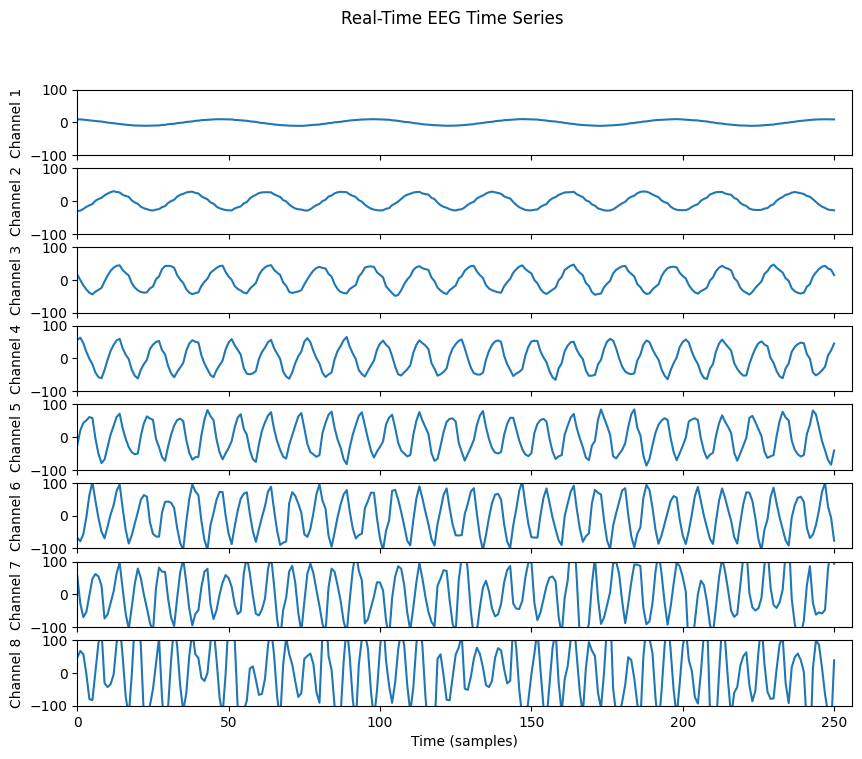

Real-time plotting stopped.


In [5]:
from pylsl import StreamInlet, resolve_stream
import numpy as np
import time
import matplotlib.pyplot as plt
from collections import deque

# Parameters
SAMPLE_RATE = 256  # Adjust to match the EEG sample rate
FRAME_DURATION = 1  # Duration for each frame in seconds
NUM_CHANNELS = 8  # Number of channels (4 in your setup)
MAX_PLOT_POINTS = 256  # Number of points to display on the plot at any time

# Find EEG stream
print("Looking for an EEG stream...")
streams = resolve_stream('type', 'EEG')
inlet = StreamInlet(streams[0])

# Prepare for real-time plot
plt.ion()  # Enable interactive mode
fig, ax = plt.subplots(NUM_CHANNELS, 1, figsize=(10, 8), sharex=True)

# Create lines for each channel's plot
lines = [ax[i].plot([], [])[0] for i in range(NUM_CHANNELS)]
for i in range(NUM_CHANNELS):
    ax[i].set_xlim(0, MAX_PLOT_POINTS)
    ax[i].set_ylim(-100, 100)  # Adjust Y-axis range as needed for your data
    ax[i].set_ylabel(f"Channel {i+1}")

ax[-1].set_xlabel("Time (samples)")
fig.suptitle("Real-Time EEG Time Series")

# Initialize a deque to store the last MAX_PLOT_POINTS points for each channel
data_buffer = [deque(maxlen=MAX_PLOT_POINTS) for _ in range(NUM_CHANNELS)]

try:
    while True:
        # Collect samples for a frame duration
        start_time = time.time()
        
        while time.time() - start_time < FRAME_DURATION:
            sample, timestamp = inlet.pull_sample()
            if sample:
                for i in range(NUM_CHANNELS):
                    data_buffer[i].append(sample[i])  # Append data for each channel

        # Update each line with the latest time series data
        for i, line in enumerate(lines):
            line.set_xdata(np.arange(len(data_buffer[i])))
            line.set_ydata(data_buffer[i])

        plt.pause(0.01)  # Brief pause to update the plot

except KeyboardInterrupt:
    print("Real-time plotting stopped.")
finally:
    plt.ioff()
    plt.show()
